In [15]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline


Do right footed players weigh more than right footed players? Use ggplot/plotnine to make a graph to answer this question.

Is there a difference in height between the clubs Chelsea and Manchester United? Use ggplot/plotnine to make a graph to answer this question.

Load the necessary libraries (pandas, plotnine)


In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")

In [17]:
Fifa = pd.DataFrame(data)

In [23]:
Fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

Create a summary of the data.

In [18]:
Fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,...,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,...,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,...,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,...,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,...,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,...,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,...,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,...,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


How old is the average player in FIFA20? Plot a histogram of their ages.

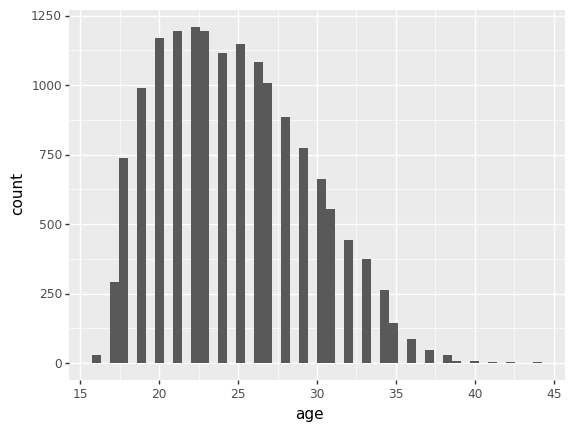

<ggplot: (301584993)>

In [20]:
# Average age of a player in FIFA20 = 24.7632
(ggplot(Fifa, aes("age"))
 + geom_histogram())

Do right footed players weigh more than right footed players? Use ggplot/plotnine to make a graph to answer this question.

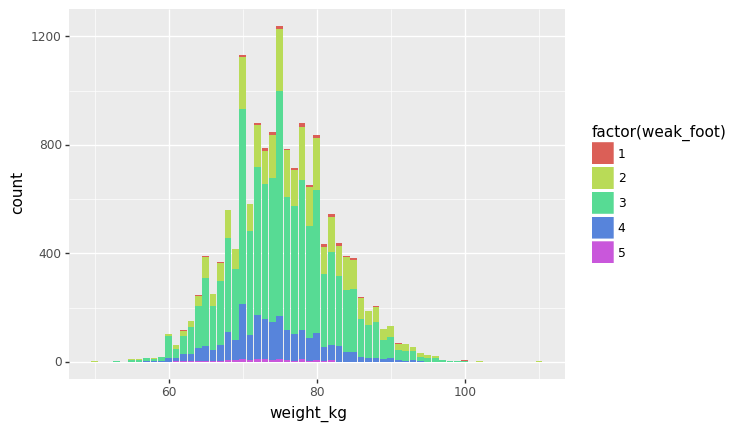

<ggplot: (300618513)>

In [22]:
(ggplot(Fifa, aes("weight_kg", fill = "factor(weak_foot)"))
 + geom_bar())